<a href="https://colab.research.google.com/github/Vysakhks1807/DSML-project/blob/main/project_DSML__2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn shap -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('online_shoppers_intention.csv')

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Initial inspection

In [6]:
print("\nShape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)
print("\nRevenue distribution:\n", data["Revenue"].value_counts(normalize=True))


Shape: (12330, 18)

Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Data types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            

Plot numerical features

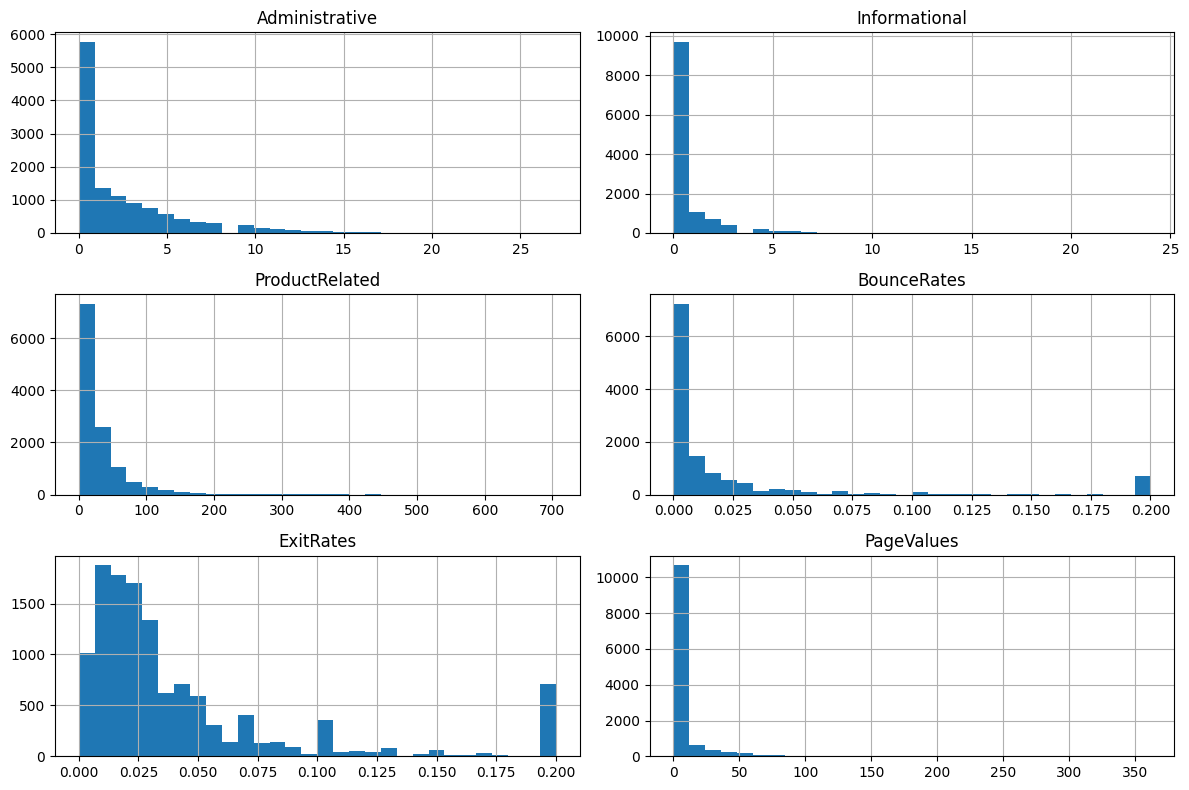

In [7]:
numerical = ['Administrative', 'Informational', 'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues']
data[numerical].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

Plot categorical features

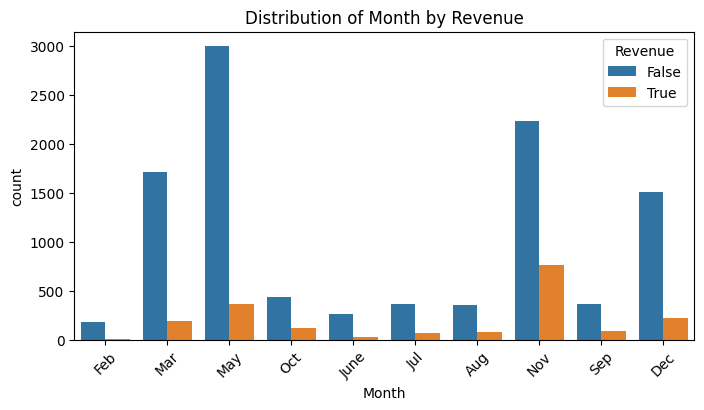

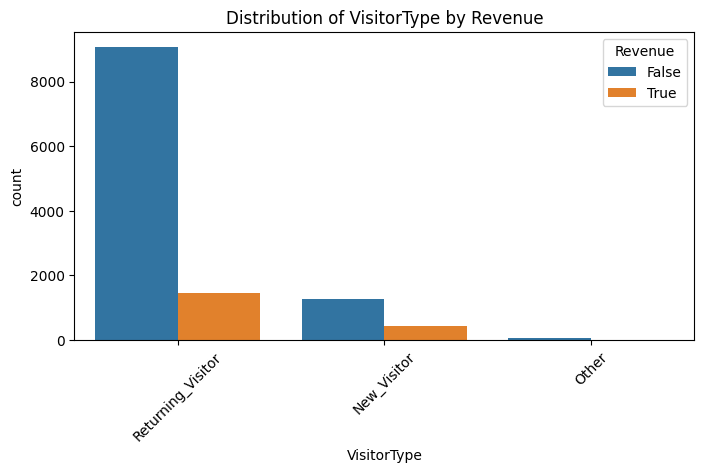

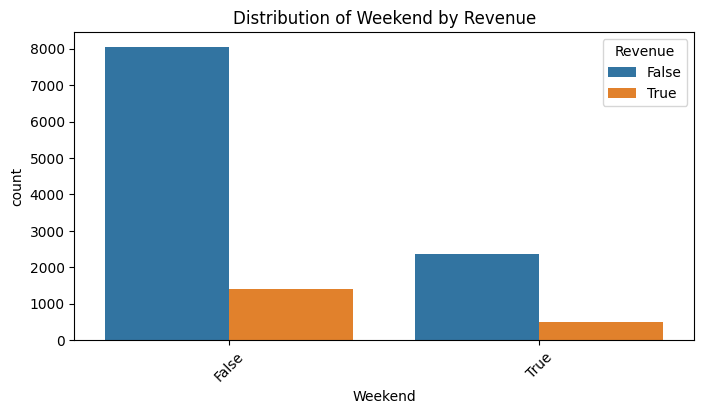

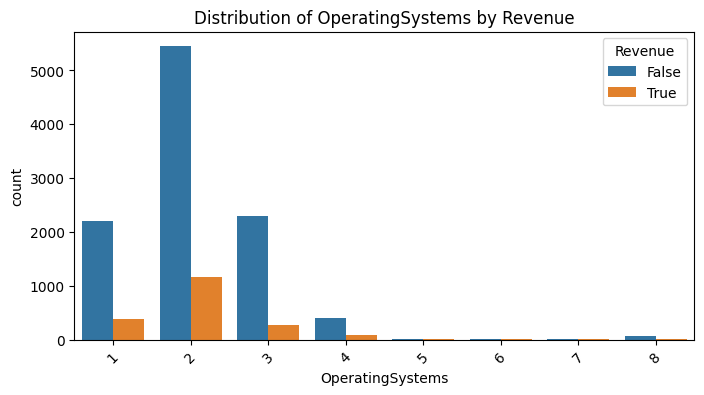

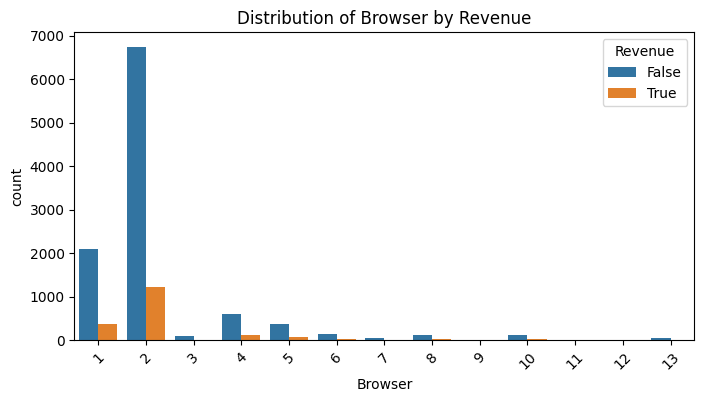

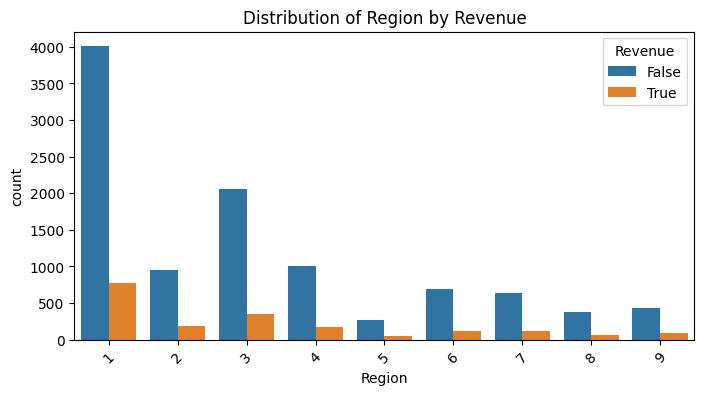

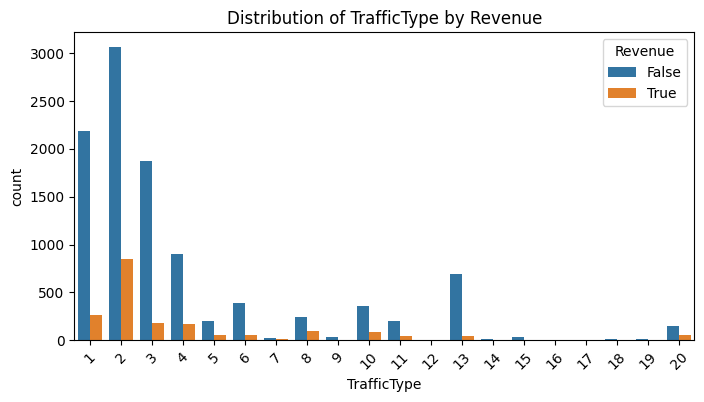

In [8]:
categorical = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data, hue='Revenue')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col} by Revenue')
    plt.show()

Compare means of numerical features by Revenue

In [9]:
print("\nGroup-wise Means by Revenue:\n", data.groupby('Revenue')[numerical].mean())


Group-wise Means by Revenue:
          Administrative  Informational  ProductRelated  BounceRates  \
Revenue                                                               
False          2.117732       0.451833       28.714642     0.025317   
True           3.393606       0.786164       48.210168     0.005117   

         ExitRates  PageValues  
Revenue                         
False     0.047378    1.975998  
True      0.019555   27.264518  


Correlation heatmap

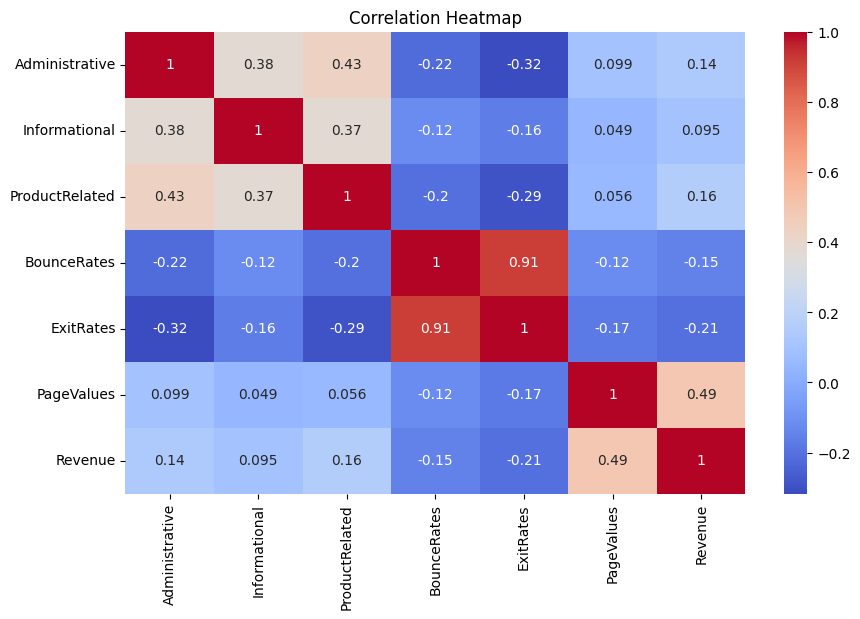

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical + ['Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Revenue by Month

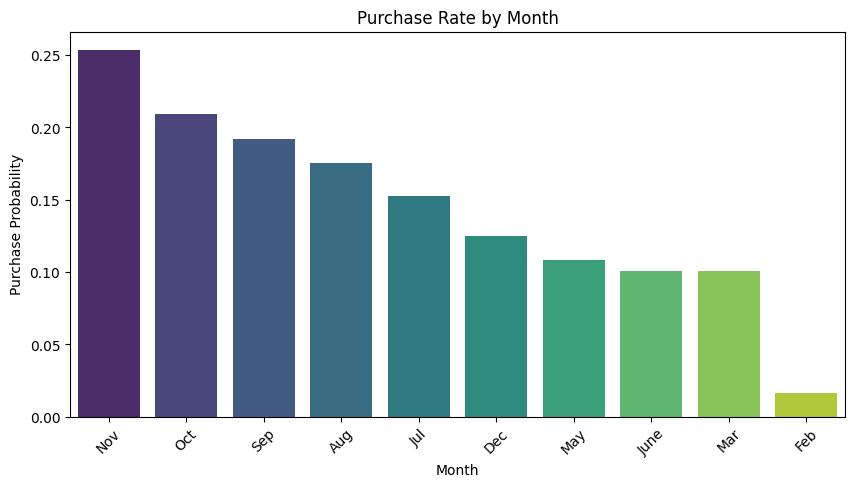

In [13]:
monthly_revenue_df = monthly_revenue.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(
    data=monthly_revenue_df,
    x='Month',
    y='Revenue',
    hue='Month',
    palette='viridis',
    legend=False
)
plt.title('Purchase Rate by Month')
plt.ylabel('Purchase Probability')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


Revenue by Weekend

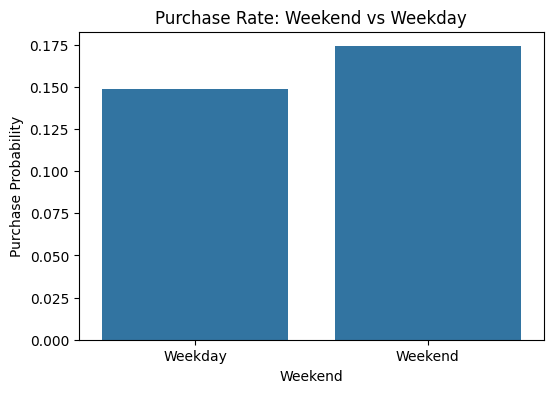

In [12]:
weekend_revenue = data.groupby('Weekend')['Revenue'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_revenue.index, y=weekend_revenue.values)
plt.title('Purchase Rate: Weekend vs Weekday')
plt.ylabel('Purchase Probability')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()